In [1]:
import sys
import os

# Add the src directory to Python path so model.py can find ssn and net modules
sys.path.append(os.path.abspath('../src'))

from src.model import model
from src.model_outerweights import model_outerweights
from src.greedy_insertion import _sample_uniform_sphere_points
from src.training_logger import run_training_with_logging

import numpy as np
from loguru import logger
import torch

In [2]:
# load the data
path = '../data_result/raw_data/VDP_beta_0.1_grid_combined.npy'# Initialize the weights
data = np.load(path)
logger.info(f"Loaded data with shape: {data.shape}, dtype: {data.dtype}")

2025-08-27 05:52:44.103 | INFO     | __main__:<module>:4 - Loaded data with shape: (1800,), dtype: [('x', '<f8', (2,)), ('dv', '<f8', (2,)), ('v', '<f8')]


In [3]:
# Initialize the parameter
power = 2.1
M = 10 # number greedy insertion selected
num_iterations = 30
loss_weights = (1.0, 1.0)
pruning_threshold = 1e-15

gamma = 5.0
alpha = 1e-1
regularization = (gamma, alpha) 
th = 0.0



In [4]:
# Initialize the model 
model_1 = model(data, torch.relu, power, regularization, optimizer='Adam', loss_weights = loss_weights)
model_2 = model_outerweights(data, torch.relu, power, regularization, optimizer='SSN_TR', loss_weights = loss_weights, th = th)

2025-08-27 05:52:44 | INFO     | src.model:_configure_logger:89 - VDPModel initialized
2025-08-27 05:52:44 | INFO     | src.model_outerweights:_configure_logger:90 - VDPModel (outer weights) initialized


In [5]:
# Set up the initializing weights and bias
init_weights, init_bias = _sample_uniform_sphere_points(M)

In [6]:
model_result, weight_raw, bias_raw, outerweight_raw = model_1.train(
    iterations=1000,
    display_every=200,
    inner_weights=init_weights, inner_bias=init_bias,
)
logger.info("Initialization done"); logger.info(f"Initial weights shape: {weight_raw.shape}, bias shape: {bias_raw.shape}")

2025-08-27 05:52:44 | INFO     | src.model:train:269 - Starting network training session
2025-08-27 05:52:44 | INFO     | src.model:_prepare_data:134 - Training set: 1620 samples, Validation set: 180 samples
2025-08-27 05:52:44 | INFO     | src.model:_prepare_data:137 - Data ranges - x: [-3.00, 3.00], v: [0.00, 10.96], dv: [-13.19, 13.19]
2025-08-27 05:52:44 | INFO     | src.model:_create_network:171 - Creating network with 10 neurons
2025-08-27 05:52:44 | INFO     | src.model:_setup_optimizer:197 - Using Adam optimizer with lr=0.01
2025-08-27 05:52:44 | INFO     | src.model:train:288 - Training model, saving to /Users/ruizhechao/Documents/NNforHJB/train_history
2025-08-27 05:52:44 | INFO     | src.model:train:289 - Training hyperparameters: iterations=1000, batch_size=1620, display_every=200
2025-08-27 05:52:44 | INFO     | src.model:train:290 - Loss weights: value=1.0, gradient=1.0
2025-08-27 05:52:44 | INFO     | src.model:train:335 - Epoch 0: Train Loss = 31.794406, Val Loss = 30.7

In [7]:
# Training with improved logging
training_logger, weight_raw, bias_raw, outerweight_raw = run_training_with_logging(
    data, model_1, model_2, model_result, weight_raw, bias_raw, outerweight_raw,
    num_iterations, M, alpha, pruning_threshold, power, gamma
)

logger.info("Training completed with improved logging")

2025-08-27 05:52:45 | INFO     | src.training_logger:run_training_with_logging:133 - Iteration 0 - weights shape: (10, 2)
2025-08-27 05:52:45 | INFO     | src.model_outerweights:train:266 - Starting network training session (outer weights only)
2025-08-27 05:52:45 | INFO     | src.model_outerweights:_prepare_data:135 - Training set: 1620 samples, Validation set: 180 samples
2025-08-27 05:52:45 | INFO     | src.model_outerweights:_prepare_data:138 - Data ranges - x: [-3.00, 3.00], v: [0.00, 10.96], dv: [-13.19, 13.19]
2025-08-27 05:52:45 | INFO     | src.model_outerweights:_setup_optimizer:185 - Using SSN_TR optimizer with alpha=0.1, gamma=5.0, th=0.0
2025-08-27 05:52:45 | INFO     | src.model_outerweights:train:283 - Training model, saving to /Users/ruizhechao/Documents/NNforHJB/train_history
2025-08-27 05:52:45 | INFO     | src.model_outerweights:train:284 - Training hyperparameters: iterations=5000, batch_size=1620, display_every=1000
2025-08-27 05:52:45 | INFO     | src.model_outerw

In [8]:
training_logger.history.keys()

dict_keys(['weights', 'biases', 'neuron_count', 'test_metrics', 'hyperparameters'])

Training run: 29 iterations, max neurons: 33
Optimal iteration: 2 with 33 neurons
Polar coordinate analysis saved to ../data_result/plot/weights_polar_analysis_single.png


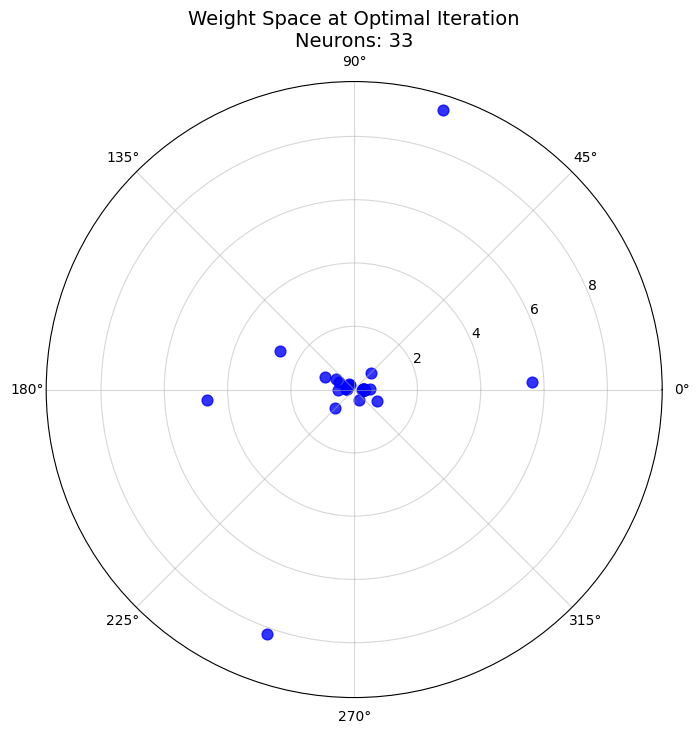


=== Weight Distribution Analysis ===
Mean norm: 1.2583
Std norm: 2.2512
Weight range: [-8.0090, 8.3249]
Number of neurons: 33

=== Weight Evolution ===
Neuron counts across iterations:
Iteration 0: 20 neurons
Iteration 1: 30 neurons
Iteration 2: 33 neurons
Iteration 3: 30 neurons
Iteration 4: 31 neurons
Iteration 5: 30 neurons
Iteration 6: 29 neurons
Iteration 7: 30 neurons
Iteration 8: 31 neurons
Iteration 9: 30 neurons
Iteration 10: 30 neurons
Iteration 11: 31 neurons
Iteration 12: 30 neurons
Iteration 13: 30 neurons
Iteration 14: 31 neurons
Iteration 15: 31 neurons
Iteration 16: 30 neurons
Iteration 17: 30 neurons
Iteration 18: 31 neurons
Iteration 19: 31 neurons
Iteration 20: 31 neurons
Iteration 21: 31 neurons
Iteration 22: 31 neurons
Iteration 23: 30 neurons
Iteration 24: 30 neurons
Iteration 25: 31 neurons
Iteration 26: 31 neurons
Iteration 27: 31 neurons
Iteration 28: 31 neurons


In [ ]:
# =============================================================================
# PLOT: Weight space visualization in polar coordinates
# Shows the distribution of weights in 2D space for the current training run
# =============================================================================

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract weights from the current training run
weights_run = training_logger.history['weights']
biases_run = training_logger.history['biases']
neurons_run = training_logger.history['neuron_count']

print(f"Training run: {len(weights_run)} iterations, max neurons: {max(neurons_run)}")

# Find optimal iteration (iteration with the most neurons)
optimal_iter = neurons_run.index(max(neurons_run))
print(f"Optimal iteration: {optimal_iter} with {neurons_run[optimal_iter]} neurons")

# Extract weights at optimal iteration
weights_optimal = weights_run[optimal_iter]
b_optimal = biases_run[optimal_iter].reshape(1, -1)   # (1, n)
a_optimal = weights_optimal.T                         # (2, n)
Z = a_optimal / (1 + b_optimal) 

# Create polar coordinate visualization
fig, ax = plt.subplots(1, 1, figsize=(10, 8), subplot_kw={'projection': 'polar'})

# Compute angles and radii in weight space (2D)
angles = np.arctan2(Z[1], Z[0])
xy_norms = np.linalg.norm(Z, axis=0)

# Plot in polar coordinates
ax.scatter(angles, xy_norms, color='blue', alpha=0.8, s=60)
ax.set_title(f'Weight Space at Optimal Iteration\nNeurons: {neurons_run[optimal_iter]}', fontsize=14)
ax.grid(True, alpha=0.5)

# Save the figure
plt.savefig('../data_result/plot/weights_polar_analysis_single.png', dpi=300, bbox_inches='tight')
print(f"Polar coordinate analysis saved to ../data_result/plot/weights_polar_analysis_single.png")

# Show plot
plt.show()

# Additional analysis: Weight distribution statistics
print("\n=== Weight Distribution Analysis ===")
print(f"Mean norm: {np.mean(xy_norms):.4f}")
print(f"Std norm: {np.std(xy_norms):.4f}")
print(f"Weight range: [{weights_optimal.min():.4f}, {weights_optimal.max():.4f}]")
print(f"Number of neurons: {weights_optimal.shape[0]}")

# Optional: Show weight evolution across iterations
if len(weights_run) > 1:
    print(f"\n=== Weight Evolution ===")
    print("Neuron counts across iterations:")
    for i, count in enumerate(neurons_run):
        print(f"Iteration {i}: {count} neurons")

## Test with the L1 Penalty ##

In [10]:
# Initialize the parameter
power = 2.1
M = 10 # number greedy insertion selected
num_iterations = 30
loss_weights = (1.0, 1.0)
pruning_threshold = 1e-13

gamma = 1e-5
alpha = 1e-1
regularization = (gamma, alpha) 
th = 1.0

In [11]:
import sys
import os

# Add the src directory to Python path so model.py can find ssn and net modules
sys.path.append(os.path.abspath('../src'))

from src.model import model
from src.model_outerweights import model_outerweights
from src.greedy_insertion import insertion
from src.training_logger import run_training_with_logging

import numpy as np
from loguru import logger
import torch
# Initialize the model 
model_1 = model(data, torch.relu, power, regularization, optimizer='Adam', loss_weights = loss_weights)
model_2 = model_outerweights(data, torch.relu, power, regularization, optimizer='SSN_TR', loss_weights = loss_weights, th = th)
# Set up the initializing weights and bias
init_weights = np.random.randn(M, 2) * 0.1
init_bias = np.random.randn(M)

model_result, weight_raw, bias_raw, outerweight_raw = model_1.train(
    iterations=1000,
    display_every=200,
    inner_weights=init_weights, inner_bias=init_bias,
)
logger.info("Initialization done"); logger.info(f"Initial weights shape: {weight_raw.shape}, bias shape: {bias_raw.shape}")

# Training with improved logging
training_logger_1, weight_raw_1, bias_raw_1, outerweight_raw_1 = run_training_with_logging(
    data, model_1, model_2, model_result, weight_raw, bias_raw, outerweight_raw,
    num_iterations, M, alpha, pruning_threshold, power, gamma
)

logger.info("Training completed with improved logging")


2025-08-27 06:17:11 | INFO     | src.model:_configure_logger:89 - VDPModel initialized
2025-08-27 06:17:11 | INFO     | src.model_outerweights:_configure_logger:90 - VDPModel (outer weights) initialized
2025-08-27 06:17:11 | INFO     | src.model:train:269 - Starting network training session
2025-08-27 06:17:11 | INFO     | src.model:_prepare_data:134 - Training set: 1620 samples, Validation set: 180 samples
2025-08-27 06:17:11 | INFO     | src.model:_prepare_data:137 - Data ranges - x: [-3.00, 3.00], v: [0.00, 10.96], dv: [-13.19, 13.19]
2025-08-27 06:17:11 | INFO     | src.model:_create_network:171 - Creating network with 10 neurons
2025-08-27 06:17:11 | INFO     | src.model:_setup_optimizer:197 - Using Adam optimizer with lr=0.01
2025-08-27 06:17:11 | INFO     | src.model:train:288 - Training model, saving to /Users/ruizhechao/Documents/NNforHJB/train_history
2025-08-27 06:17:11 | INFO     | src.model:train:289 - Training hyperparameters: iterations=1000, batch_size=1620, display_eve

Training run: 29 iterations, max neurons: 32
Optimal iteration: 4 with 32 neurons
Polar coordinate analysis saved to ../data_result/plot/weights_polar_analysis_single.png


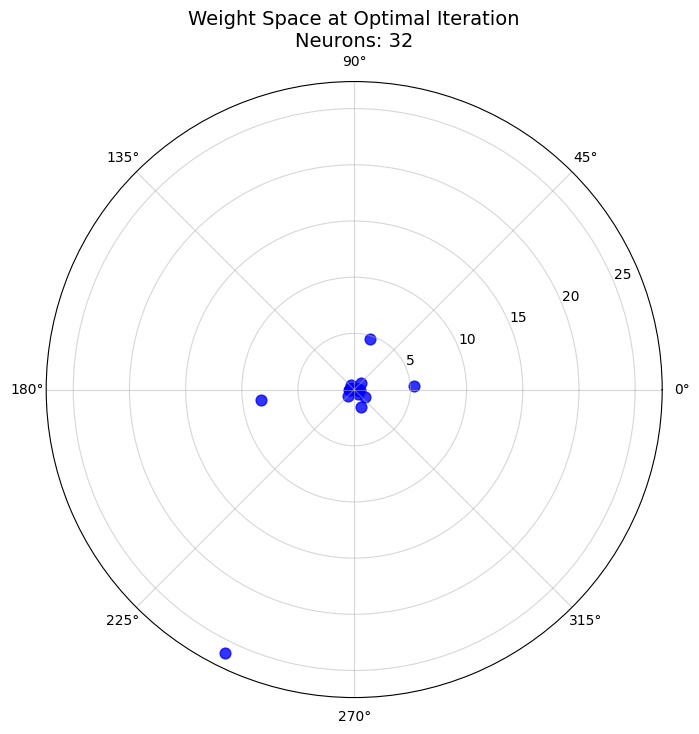


=== Weight Distribution Analysis ===
Mean norm: 1.7915
Std norm: 4.7037
Weight range: [-9.3928, 9.9717]
Number of neurons: 32

=== Weight Evolution ===
Neuron counts across iterations:
Iteration 0: 15 neurons
Iteration 1: 25 neurons
Iteration 2: 30 neurons
Iteration 3: 30 neurons
Iteration 4: 32 neurons
Iteration 5: 32 neurons
Iteration 6: 32 neurons
Iteration 7: 32 neurons
Iteration 8: 32 neurons
Iteration 9: 31 neurons
Iteration 10: 30 neurons
Iteration 11: 31 neurons
Iteration 12: 32 neurons
Iteration 13: 32 neurons
Iteration 14: 32 neurons
Iteration 15: 32 neurons
Iteration 16: 32 neurons
Iteration 17: 32 neurons
Iteration 18: 32 neurons
Iteration 19: 32 neurons
Iteration 20: 32 neurons
Iteration 21: 32 neurons
Iteration 22: 31 neurons
Iteration 23: 31 neurons
Iteration 24: 32 neurons
Iteration 25: 32 neurons
Iteration 26: 32 neurons
Iteration 27: 32 neurons
Iteration 28: 32 neurons


In [12]:
# =============================================================================
# PLOT: Weight space visualization in polar coordinates
# Shows the distribution of weights in 2D space for the current training run
# =============================================================================

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract weights from the current training run
weights_run = training_logger_1.history['weights']
biases_run = training_logger_1.history['biases']
neurons_run = training_logger_1.history['neuron_count']

print(f"Training run: {len(weights_run)} iterations, max neurons: {max(neurons_run)}")

# Find optimal iteration (iteration with the most neurons)
optimal_iter = neurons_run.index(max(neurons_run))
print(f"Optimal iteration: {optimal_iter} with {neurons_run[optimal_iter]} neurons")

# Extract weights at optimal iteration
weights_optimal = weights_run[optimal_iter]
b_optimal = biases_run[optimal_iter].reshape(1, -1)   # (1, n)
a_optimal = weights_optimal.T                          # (2, n)
Z = a_optimal / (1 + b_optimal) 

# Create polar coordinate visualization
fig, ax = plt.subplots(1, 1, figsize=(10, 8), subplot_kw={'projection': 'polar'})

# Compute angles and radii in weight space (2D)
angles = np.arctan2(Z[1], Z[0])
xy_norms = np.linalg.norm(Z, axis=0)

# Plot in polar coordinates
ax.scatter(angles, xy_norms, color='blue', alpha=0.8, s=60)
ax.set_title(f'Weight Space at Optimal Iteration\nNeurons: {neurons_run[optimal_iter]}', fontsize=14)
ax.grid(True, alpha=0.5)

# Save the figure
plt.savefig('../data_result/plot/weights_polar_analysis_single.png', dpi=300, bbox_inches='tight')
print(f"Polar coordinate analysis saved to ../data_result/plot/weights_polar_analysis_single.png")

# Show plot
plt.show()

# Additional analysis: Weight distribution statistics
print("\n=== Weight Distribution Analysis ===")
print(f"Mean norm: {np.mean(xy_norms):.4f}")
print(f"Std norm: {np.std(xy_norms):.4f}")
print(f"Weight range: [{weights_optimal.min():.4f}, {weights_optimal.max():.4f}]")
print(f"Number of neurons: {weights_optimal.shape[0]}")

# Optional: Show weight evolution across iterations
if len(weights_run) > 1:
    print(f"\n=== Weight Evolution ===")
    print("Neuron counts across iterations:")
    for i, count in enumerate(neurons_run):
        print(f"Iteration {i}: {count} neurons")